In [41]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array 
from tensorflow.keras.models import load_model
import numpy as np  
import cv2 as cv
import matplotlib.pyplot as plt
model = load_model('face.h5')
model1 = load_model('linear.h5')
model2 = load_model('gender.h5')
model3 = load_model('emotion.h5')

In [42]:
label = {0: '1-5 ',
          1: '6-10 ',    
          2: '11-15 ',          
          3: '16-20 ',          
          4: '21-25 ',
          5: '26-30 ',         
          6: '31-35 ',
          7: '36-40 ',
          8: '41-45 ',
          9: '46-50 ',
          10: '51-55 ',
          11: '56-60 ',
          12: '61-65 ',
          13: '65-70 ',
          14: '71 -75 ',
          15: '75-80 ',
          16: '80-85 ',
          17: '85 tro len'}
gender_labels = ['Male', 'Female']
emotion_labels=['Angry','Disgust','Happy','Neutral','sad','Surprise']


(225, 225, 3)
0.35950002 0.2000725 0.69637823 0.6845675


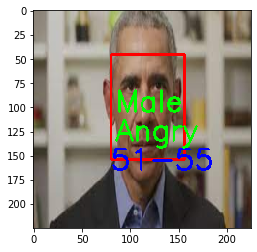

In [48]:
frame = cv.imread('obama.jpg', cv.IMREAD_UNCHANGED)
#face_cascade = cv.CascadeClassifier()
#face_cascade.load('face.xml')  
frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
frame = cv.resize(frame,(225,225))
print(frame.shape)
face = model.predict(frame.reshape(1,225,225,3))

for (x1,y1,x2,y2) in face:
    #x1 = int(x1*225)
    #y1 = int(y1*225)
    #x2 = int(x2*225)
    #y2 = int(y2*225)
    img = cv.rectangle(frame,(int(x1*225),int(y1*225)),(int(x2*225),int(y2*225)),(255,0,0),2)
    roi_color=frame[int(y1*225):int(y2*225),int(x1*225):int(x2*225)] 
    roi_color=cv.resize(roi_color,(100,100),interpolation=cv.INTER_AREA)    
    result = model1.predict(np.array(roi_color).reshape(-1,100,100,3))
    labels=label[(int(result))]
    label_position=(int(x1*225),int(y2*225)+10) #50 pixels below to move the label oqutside the face
    cv.putText(frame,labels,label_position,cv.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
    
    roi_gender=frame[int(y1*225):int(y2*225),int(x1*225):int(x2*225)] 
    roi_gender=cv.resize(roi_gender,(200,200),interpolation=cv.INTER_AREA)    
    gender = model2.predict(np.array(roi_gender).reshape(-1,200,200,3))
    gender = (gender>= 0.5).astype(int)[:,0]
    gender_label=gender_labels[gender[0]] 
    label_position1=(int(x1*225)+5,int(y2*225)-50) #50 pixels below to move the label oqutside the face
    cv.putText(frame,gender_label,label_position1,cv.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
    
    roi_emo=gray[int(y1*225):int(y2*225),int(x1*225):int(x2*225)] 
    roi_emo=cv.resize(roi_emo,(48,48),interpolation=cv.INTER_AREA)    
    emo = model3.predict(np.array(roi_emo).reshape(-1,48,48,1))
        
    emotion_label=emotion_labels[int(np.argmax(emo,axis=1))]
    label_position2=(int(x1*225)+5,int(y2*225)-20) #50 pixels below to move the label oqutside the face
    cv.putText(frame,emotion_label,label_position2,cv.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
    
    print(x1,y1,x2,y2)
plt.imshow(roi_color)    
plt.imshow(img)    


In [38]:
vid = cv.VideoCapture(0)
  
while(True):
      
    # Capture the video frame
    # by frame
    ret, frame = vid.read()
    #print(frame.shape)
    if not ret:
        print(' can not read video frame. Video ended?')
        break
    #frame=cv.cvtColor(frame,cv.COLOR_BGR2RGB)
    #faces=sign_cascade.detectMultiScale(gray,1.5,2)
    face = cv.resize(frame,(225,225))
    face = model.predict(face.reshape(1,225,225,3))
    gray=cv.cvtColor(frame,cv.COLOR_BGR2GRAY)

    for (x1,y1,x2,y2) in face:
        #cv.rectangle(frame,(int(x1*680),int(y1*480)),(int(x2*680),int(y2*480)),(255,0,0),2)
        cv.rectangle(frame,(int(x1*670),int(y1*680)),(int(x2*680),int(y2*680)),(255,0,0),2)
        #roi_color=frame[int(y1*480):int(y2*480),int(x1*680):int(x2*680)] 
        roi_color=frame[int(y1*680):int(y2*680),int(x1*680):int(x2*680)] 
        roi_color=cv.resize(roi_color,(100,100),interpolation=cv.INTER_AREA)    
        result = model1.predict(np.array(roi_color).reshape(-1,100,100,3))
        labels=label[(int(result))]
        label_position=(int(x1*225),int(y2*225)+10) #50 pixels below to move the label oqutside the face
        cv.putText(frame,labels,label_position,cv.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
        
        
        roi_gender=frame[int(y1*680):int(y2*680),int(x1*680):int(x2*680)] 
        roi_gender=cv.resize(roi_gender,(200,200),interpolation=cv.INTER_AREA)    
        gender = model2.predict(np.array(roi_gender).reshape(-1,200,200,3))
        gender = (gender>= 0.5).astype(int)[:,0]
        gender_label=gender_labels[gender[0]] 
        label_position1=(int(x1*225)+5,int(y2*225)-50) #50 pixels below to move the label oqutside the face
        cv.putText(frame,gender_label,label_position1,cv.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
        
        roi_emo=gray[int(y1*680):int(y2*680),int(x1*680):int(x2*680)] 
        roi_emo=cv.resize(roi_emo,(48,48),interpolation=cv.INTER_AREA)    
        emo = model3.predict(np.array(roi_emo).reshape(-1,48,48,1))
        
        emotion_label=emotion_labels[int(np.argmax(emo,axis=1))]
        label_position2=(int(x1*225)+5,int(y2*225)-30) #50 pixels below to move the label oqutside the face
        cv.putText(frame,emotion_label,label_position2,cv.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
    
    
  
    # Display the resulting frame
    cv.imshow('frame', frame)
    #cv.imshow('roi',roi_color) 
    # the 'q' button is set as the
    # quitting button you may use any
    # desired button of your choice
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
  
# After the loop release the cap object
vid.release()
# Destroy all the windows
cv.destroyAllWindows()

In [37]:
vid = cv.VideoCapture(0)
  
while(True):
      
    # Capture the video frame
    # by frame
    ret, frame = vid.read()
    print(frame.shape)
    if not ret:
        print(' can not read video frame. Video ended?')
        break
    #frame=cv.cvtColor(frame,cv.COLOR_BGR2RGB)
    #faces=sign_cascade.detectMultiScale(gray,1.5,2)
    frame = cv.resize(frame,(225,225))
    face = model.predict(frame.reshape(1,225,225,3))

    for (x1,y1,x2,y2) in face:
        #cv.rectangle(frame,(int(x1*680),int(y1*480)),(int(x2*680),int(y2*480)),(255,0,0),2)
        cv.rectangle(frame,(int(x1*225),int(y1*225)),(int(x2*225),int(y2*225)),(255,0,0),2)
        roi_color=frame[int(y1*225):int(y2*225),int(x1*225):int(x2*225)] 
        roi_color=cv.resize(roi_color,(100,100),interpolation=cv.INTER_AREA)    
        result = model1.predict(np.array(roi_color).reshape(-1,100,100,3))
        labels=label[(int(result))]
        label_position=(int(x1*225),int(y2*225)+10) #50 pixels below to move the label oqutside the face
        cv.putText(frame,labels,label_position,cv.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
        
        roi_gender=frame[int(y1*225):int(y2*225),int(x1*225):int(x2*225)] 
        roi_gender=cv.resize(roi_gender,(200,200),interpolation=cv.INTER_AREA)    
        gender = model2.predict(np.array(roi_gender).reshape(-1,200,200,3))
        gender = (gender>= 0.5).astype(int)[:,0]
        gender_label=gender_labels[gender[0]] 
        label_position1=(int(x1*225)+5,int(y2*225)-50) #50 pixels below to move the label oqutside the face
        cv.putText(frame,gender_label,label_position1,cv.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
        
    
  
    # Display the resulting frame
    cv.imshow('frame', frame)
    #cv.imshow('roi',roi_color) 
    # the 'q' button is set as the
    # quitting button you may use any
    # desired button of your choice
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
  
# After the loop release the cap object
vid.release()
# Destroy all the windows
cv.destroyAllWindows()

(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)


In [13]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array 
from keras.models import load_model
import numpy as np  
import matplotlib.pyplot as plt
import cv2 

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(200, 200))	
	
	return img

In [14]:
model2 = load_model('gender.h5')

Female


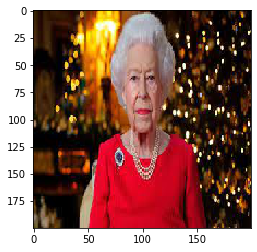

In [21]:
gender_labels = ['Male', 'Female']
img = load_image('queen2.jpg')

plt.imshow(img)
img = img_to_array(img)
img.shape
#img = cv2.GaussianBlur(img,(37,37),0,0)
#img = cv2.filter2D(img,-1,kernel)
img = img.reshape(1,200,200,3) 
result = model2.predict(img)
result = (result>= 0.5).astype(int)[:,0]
gender_label=gender_labels[result[0]] 
print(gender_label)